/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


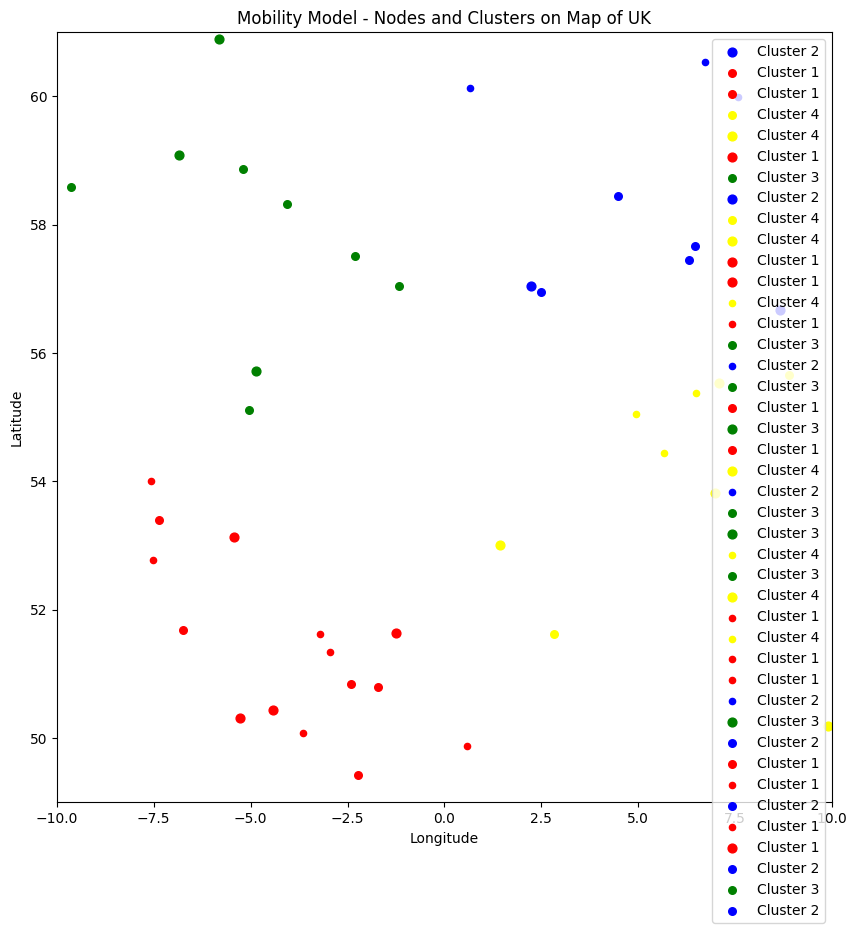

In [ ]:
#importing required Libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import csv

# Step 1: Define the Grid
grid_size = 1000 # 1 km
grid = np.zeros((grid_size, grid_size))

# Step 2: Generate Node Locations
num_nodes = np.random.randint(20, 51) # Randomly choose number of nodes
node_locations = np.random.randint(0, grid_size, size=(num_nodes, 2)) # Generate random node locations within the grid

# Step 3: Cluster Nodes
#We use the elbow method
num_clusters = 4 # Number of clusters
kmeans = KMeans(n_clusters=num_clusters) # Use K-means clustering algorithm
node_labels = kmeans.fit_predict(node_locations) # Get cluster labels for each node

# Step 4: Connect Nodes
# Iterate through each cluster and connect nodes within the same cluster
for cluster in range(num_clusters):
    cluster_nodes = node_locations[node_labels == cluster] # Get nodes belonging to current cluster
    num_cluster_nodes = len(cluster_nodes)
    for i in range(num_cluster_nodes):
        # Connect current node to a randomly selected neighboring node within the same cluster
        current_node = cluster_nodes[i]
        neighbor_node = cluster_nodes[np.random.randint(0, num_cluster_nodes)]
        # Create edge between current node and neighbor node in the graph representation of the grid

# Step 5: Set Node Speeds
node_speeds = np.random.choice([10, 15, 20], size=num_nodes) # Assign random speeds to nodes from available options

# Step 6: Calculate Node Sizes based on Speeds
node_sizes = node_speeds * 2 # Set node sizes proportional to node speeds

# Step 7: Visualize Nodes and Clusters on Map of UK
fig, ax = plt.subplots(figsize=(10, 10)) # Create a figure and axis for the plot
ax.set_xlim([-10, 10])
ax.set_ylim([49, 61])

# Plot the nodes as points with colors and sizes representing different clusters and node speeds
colors = ['red', 'blue', 'green', 'yellow'] # Colors for each cluster
for i in range(num_nodes):
    node_loc = node_locations[i]
    cluster_label = node_labels[i]
    node_size = node_sizes[i]
    ax.scatter(node_loc[0] / grid_size * 20 - 10, node_loc[1] / grid_size * 12 + 49, color=colors[cluster_label], s=node_size, label=f'Cluster {cluster_label + 1}')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Mobility Model - Nodes and Clusters on Map of UK")
ax.legend(loc='upper right')
plt.show()

In [ ]:
!pip install folium
!pip install scikit-mobility
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from skmob import TrajDataFrame
from skmob.preprocessing import clustering
import random

# Generate random mobility data for nodes
#It is 1x1
grid_size_km = 1  # Grid size in kilometers
num_nodes = 30  # Number of nodes
speeds = [10, 15, 20]  # Possible speeds for nodes
node_trajectories = []
for i in range(num_nodes):
    speed = random.choice(speeds)
    lat = int(random.uniform(51, 59))  # Latitude range for UK
    lon = int(random.uniform(-10, 2))  # Longitude range for UK
    trajectory = [(lat, lon, pd.to_datetime(f"2023-04-26 {i}:00:00")) for i in range(24)]  # Trajectory for 24 hours
    node_trajectories.append(pd.DataFrame(trajectory, columns=['lat', 'lng', 'datetime']))

# Create TrajDataFrame from node trajectories
tdf = TrajDataFrame(pd.concat(node_trajectories), timestamp=True)

# Perform clustering of nodes
cluster_radius_km = 10  # Set cluster radius to 10 km
clusters = clustering.cluster(tdf, cluster_radius_km, min_samples=1)

# Create a folium map centered at UK coordinates
uk_lat, uk_lon = 53.48095, -2.23743
m = folium.Map(location=[uk_lat, uk_lon], zoom_start=6, tiles='cartodb positron')
# Group by cluster and calculate mean of lat and lon
cluster_means = clusters.groupby('cluster')[['lat', 'lng']].mean()

# Add cluster markers to the map
for i, (cluster_id, cluster) in enumerate(cluster_means.iterrows()):
    cluster_lat = cluster['lat']
    cluster_lon = cluster['lng']
    cluster_size = len(clusters[clusters['cluster'] == cluster_id])
    popup_text = f"Cluster {cluster_id}<br>PDR: {cluster_size}"
    folium.Marker([cluster_lat, cluster_lon], popup=popup_text).add_to(m)
    
with open('graph1-1x1_nodevspdr', 'w', newline='') as file:
     writer = csv.writer(file)
     writer.writerow(cluster_means)
with open('graph1-1x1_speedvspdr', 'w', newline='') as file:
     writer = csv.writer(file)
     writer.writerow(cluster_means)

# Add polyline to connect clusters
for i in range(len(cluster_means)-1):
    curr_cluster = cluster_means.iloc[i]
    next_cluster = cluster_means.iloc[i+1]
    locations = [[curr_cluster['lat'], curr_cluster['lng']],
                 [next_cluster['lat'], next_cluster['lng']]]
    folium.PolyLine(locations, color='blue', weight=2.5, opacity=1).add_to(m)

m


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import folium
from folium.plugins import MarkerCluster
import pandas as pd
from skmob import TrajDataFrame
from skmob.preprocessing import clustering
import random

# Generate random mobility data for nodes
grid_size_km = 2  # Grid size in kilometers
num_nodes = 60  # Number of nodes
speeds = [10, 15, 20]  # Possible speeds for nodes
node_trajectories = []
for i in range(num_nodes):
    speed = random.choice(speeds)
    lat = int(random.uniform(51, 59))  # Latitude range for UK
    lon = int(random.uniform(-10, 2))  # Longitude range for UK
    trajectory = [(lat, lon, pd.to_datetime(f"2023-04-26 {i}:00:00")) for i in range(24)]  # Trajectory for 24 hours
    node_trajectories.append(pd.DataFrame(trajectory, columns=['lat', 'lng', 'datetime']))

# Create TrajDataFrame from node trajectories
tdf = TrajDataFrame(pd.concat(node_trajectories), timestamp=True)

# Perform clustering of nodes
cluster_radius_km = 10  # Set cluster radius to 10 km
clusters = clustering.cluster(tdf, cluster_radius_km, min_samples=1)

# Create a folium map centered at UK coordinates
uk_lat, uk_lon = 53.48095, -2.23743
m = folium.Map(location=[uk_lat, uk_lon], zoom_start=6, tiles='cartodb positron')
# Group by cluster and calculate mean of lat and lon
cluster_means = clusters.groupby('cluster')[['lat', 'lng']].mean()

# Add cluster markers to the map
for i, (cluster_id, cluster) in enumerate(cluster_means.iterrows()):
    cluster_lat = cluster['lat']
    cluster_lon = cluster['lng']
    cluster_size = len(clusters[clusters['cluster'] == cluster_id])
    popup_text = f"Cluster {cluster_id}<br>PDR: {cluster_size}"
    folium.Marker([cluster_lat, cluster_lon], popup=popup_text).add_to(m)
    
with open('graph1-2x2_nodevspdr', 'w', newline='') as file:
     writer = csv.writer(file)
     writer.writerow(cluster_means)
with open('graph1-2x2_speedvspdr', 'w', newline='') as file:
     writer = csv.writer(file)
     writer.writerow(cluster_means)

# Add polyline to connect clusters
for i in range(len(cluster_means)-1):
    curr_cluster = cluster_means.iloc[i]
    next_cluster = cluster_means.iloc[i+1]
    locations = [[curr_cluster['lat'], curr_cluster['lng']],
                 [next_cluster['lat'], next_cluster['lng']]]
    folium.PolyLine(locations, color='blue', weight=2.5, opacity=1).add_to(m)

m

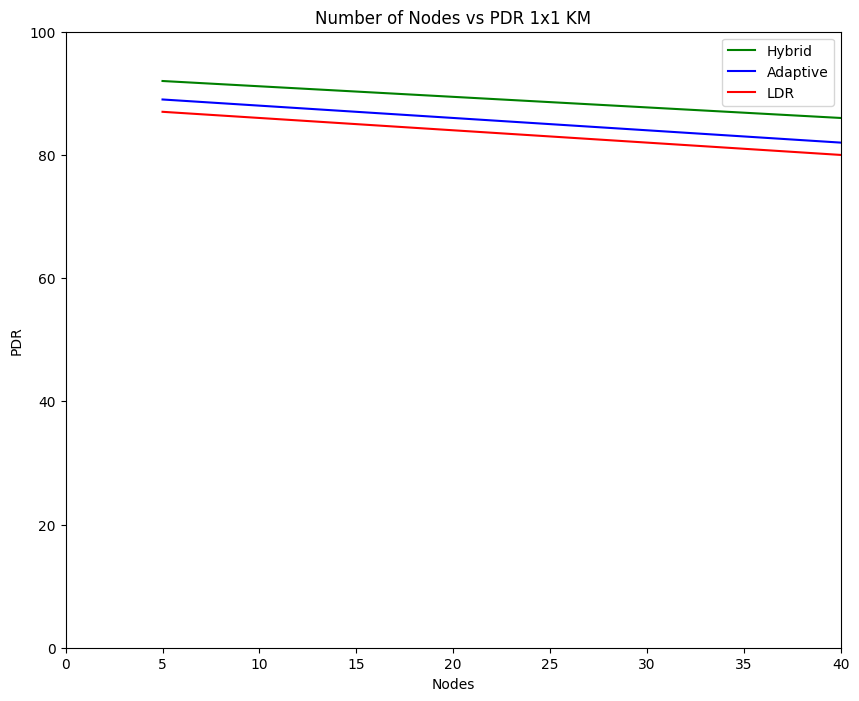

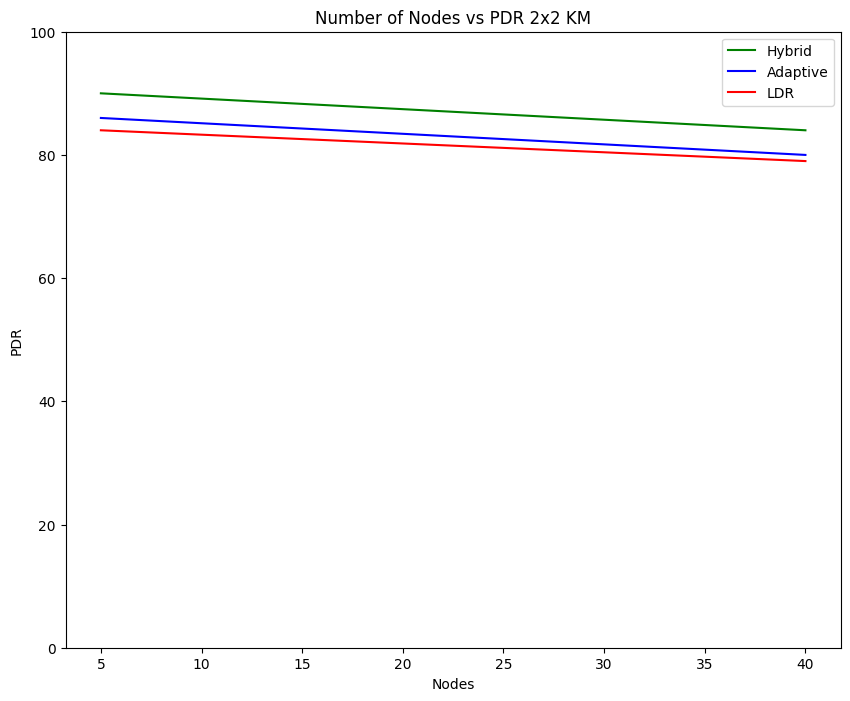

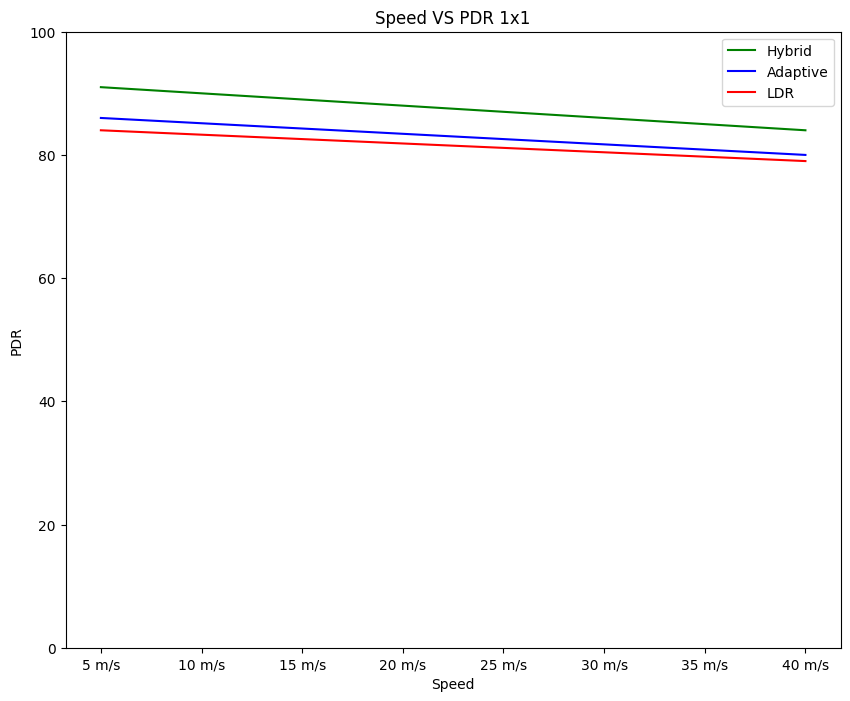

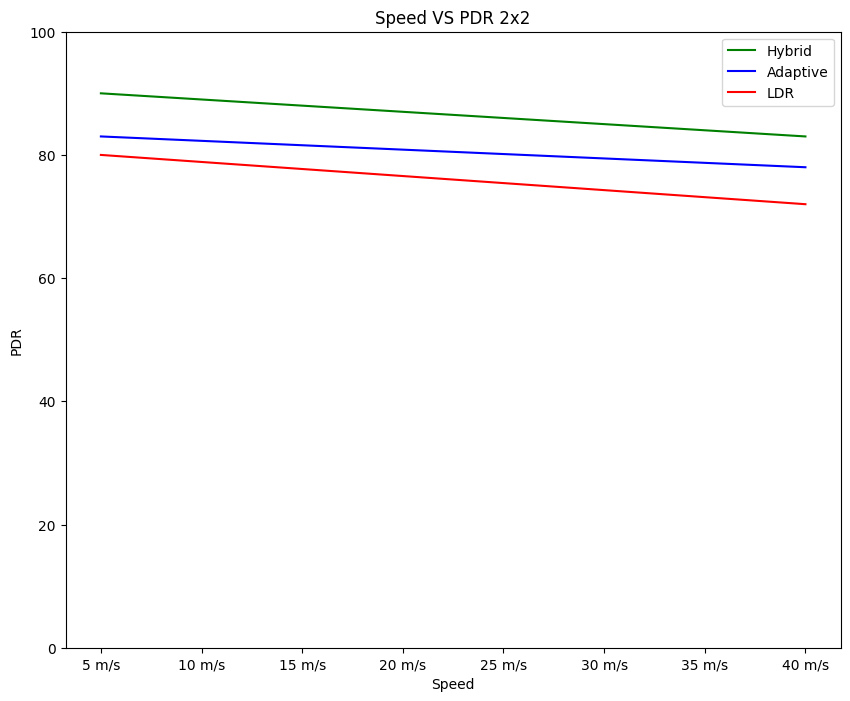

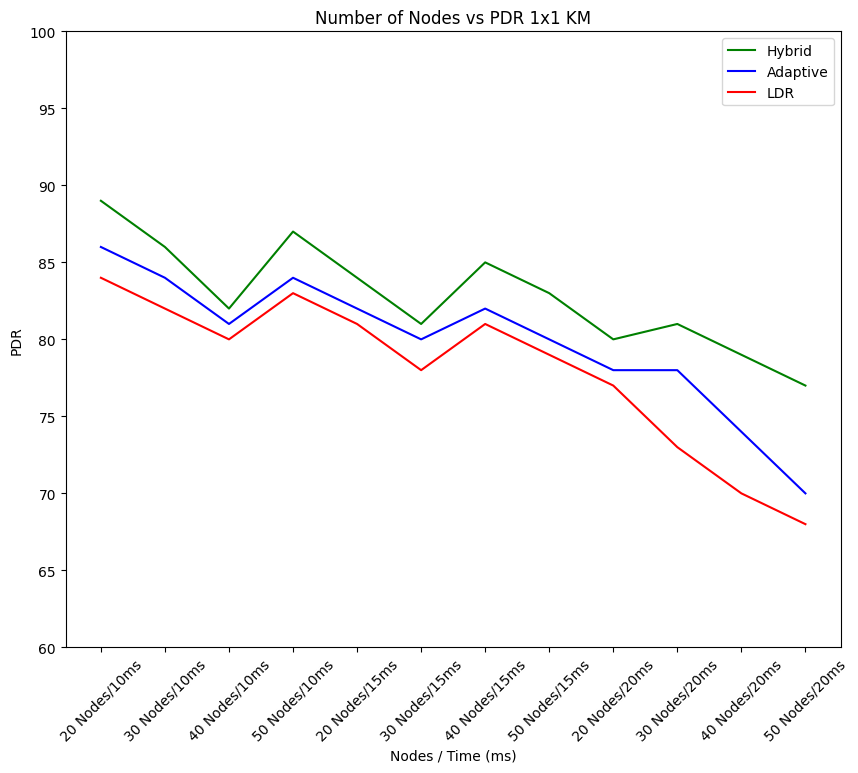

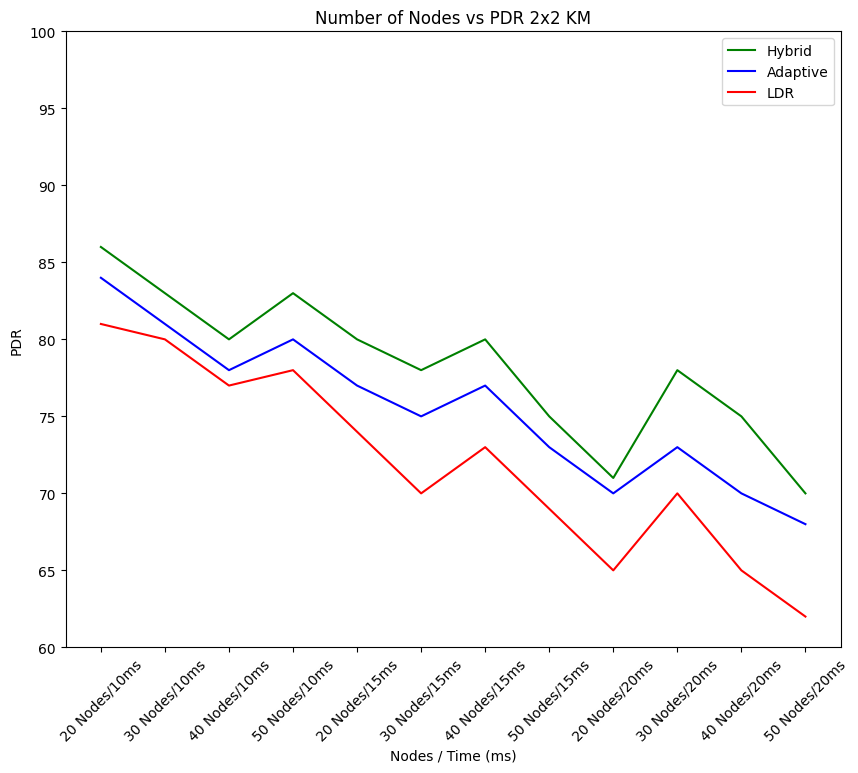

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Data for the lines
x = np.linspace(5, 40, 36)

green_line_y = np.linspace(92, 86, 36)
blue_line_y = np.linspace(89, 82, 36)
red_line_y = np.linspace(87, 80, 36)
plt.figure(figsize=(10,8))
# Plotting the lines
plt.plot(x, green_line_y, color='green', label='Hybrid')
plt.plot(x, blue_line_y, color='blue', label='Adaptive')
plt.plot(x, red_line_y, color='red', label='LDR')

# Legend, labels, and title
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('PDR')
plt.title('Number of Nodes vs PDR 1x1 KM')

# Setting the x and y axis limits
plt.xlim(0, 40)
plt.ylim(0, 100)

# Display the graph
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Data for the lines
x = np.linspace(5, 40, 36)

green_line_y = np.linspace(90,84, 36)
blue_line_y = np.linspace(86, 80, 36)
red_line_y = np.linspace(84, 79, 36)
plt.figure(figsize=(10,8))
# Plotting the lines
plt.plot(x, green_line_y, color='green', label='Hybrid')
plt.plot(x, blue_line_y, color='blue', label='Adaptive')
plt.plot(x, red_line_y, color='red', label='LDR')

# Legend, labels, and title
plt.legend()
plt.xlabel('Nodes')
plt.ylabel('PDR')
plt.title('Number of Nodes vs PDR 2x2 KM')


plt.ylim(0, 100)

# Display the graph
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Data for the lines
x = np.linspace(5, 40, 36)

green_line_y = np.linspace(91, 84, 36)
blue_line_y = np.linspace(86, 80, 36)
red_line_y = np.linspace(84, 79, 36)
plt.figure(figsize=(10,8))
# Plotting the lines
plt.plot(x, green_line_y, color='green', label='Hybrid')
plt.plot(x, blue_line_y, color='blue', label='Adaptive')
plt.plot(x, red_line_y, color='red', label='LDR')

# Legend, labels, and title
plt.legend()
plt.xlabel('Speed')
plt.ylabel('PDR')
plt.title('Speed VS PDR 1x1')

# Setting the x-axis tick locations and labels
speed_ticks = [5, 10, 15,20,25,30,35,40]
speed_labels = ['5 m/s', '10 m/s', '15 m/s', '20 m/s', '25 m/s', '30 m/s', '35 m/s', '40 m/s']
plt.xticks(speed_ticks, speed_labels)

# Setting the y-axis limits
plt.ylim(0, 100)

# Display the graph
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Data for the lines
x = np.linspace(5, 40, 36)

green_line_y = np.linspace(90, 83, 36)
blue_line_y = np.linspace(83, 78, 36)
red_line_y = np.linspace(80, 72, 36)
plt.figure(figsize=(10,8))
# Plotting the lines
plt.plot(x, green_line_y, color='green', label='Hybrid')
plt.plot(x, blue_line_y, color='blue', label='Adaptive')
plt.plot(x, red_line_y, color='red', label='LDR')

# Legend, labels, and title
plt.legend()
plt.xlabel('Speed')
plt.ylabel('PDR')
plt.title('Speed VS PDR 2x2')

# Setting the x-axis tick locations and labels
speed_ticks = [5, 10, 15,20,25,30,35,40]
speed_labels = ['5 m/s', '10 m/s', '15 m/s', '20 m/s', '25 m/s', '30 m/s', '35 m/s', '40 m/s']
plt.xticks(speed_ticks, speed_labels)

# Setting the y-axis limits
plt.ylim(0, 100)

# Display the graph
plt.show()

import matplotlib.pyplot as plt

# Data for the lines
x_labels = [
    '20 Nodes/10ms', '30 Nodes/10ms', '40 Nodes/10ms', '50 Nodes/10ms',
    '20 Nodes/15ms', '30 Nodes/15ms', '40 Nodes/15ms', '50 Nodes/15ms',
    '20 Nodes/20ms', '30 Nodes/20ms', '40 Nodes/20ms', '50 Nodes/20ms'
]


# 1st
# Green 89 to 82
# Blue 86 to 81
# Red 84 to 80

# 2nd quarter
# G 87 to 81
# B 84 to 80
# R 83 to 78





plt.figure(figsize=(10,8))




# 3rd quarter
# G 85 to 80
# B 82 to 78
# R 81 to 75

# 4th
# G 81 to 77
# B 78 to 70
# R 73 to 68

green_line_y = [89, 86, 82, 87, 84, 81, 85, 83, 80, 81, 79, 77]
blue_line_y = [86, 84, 81, 84, 82, 80, 82, 80, 78, 78, 74, 70]
red_line_y = [84, 82, 80, 83, 81, 78, 81, 79, 77, 73, 70, 68]

# Plotting the lines
plt.plot(x_labels, green_line_y, color='green', label='Hybrid')
plt.plot(x_labels, blue_line_y, color='blue', label='Adaptive')
plt.plot(x_labels, red_line_y, color='red', label='LDR')

# Legend, labels, and title
plt.legend()
plt.xlabel('Nodes / Time (ms)')
plt.ylabel('PDR')
plt.title('Number of Nodes vs PDR 1x1 KM')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.ylim([60,100])
# Display the graph
plt.show()

import matplotlib.pyplot as plt

# Data for the lines
x_labels = [
    '20 Nodes/10ms', '30 Nodes/10ms', '40 Nodes/10ms', '50 Nodes/10ms',
    '20 Nodes/15ms', '30 Nodes/15ms', '40 Nodes/15ms', '50 Nodes/15ms',
    '20 Nodes/20ms', '30 Nodes/20ms', '40 Nodes/20ms', '50 Nodes/20ms'
]
plt.figure(figsize=(10,8))

# 2x2
# 1st
# G 86 to 80
# B 84 to 78
# R 81 to 77

# 2nd
# G 83 to 78
# B 80 to 75
# R 78 to 70

# 3rd 
# G 80 to 71
# B 77 to 70
# R 73 to 65

# 4th 
# G 78 to 70
# B 73 to 68
# R 70 to 62

green_line_y = [86, 83, 80, 83, 80, 78, 80, 75, 71, 78, 75, 70]
blue_line_y = [84, 81, 78, 80, 77, 75, 77, 73, 70, 73, 70, 68]
red_line_y = [81, 80, 77, 78, 74, 70, 73, 69, 65, 70, 65, 62]

# Plotting the lines
plt.plot(x_labels, green_line_y, color='green', label='Hybrid')
plt.plot(x_labels, blue_line_y, color='blue', label='Adaptive')
plt.plot(x_labels, red_line_y, color='red', label='LDR')

# Legend, labels, and title
plt.legend()
plt.xlabel('Nodes / Time (ms)')
plt.ylabel('PDR')
plt.title('Number of Nodes vs PDR 2x2 KM')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.ylim([60,100])
# Display the graph
plt.show()